## Time Series Analysis

In [209]:
import pandas as pd
df = pd.read_csv('finaldata.csv')

### **Popularity Analysis**

Let's check the popularity of the Queries, or A.I. related terms, in the dataset which will help us better understand the popularity before we delve into the sentiments' changes.

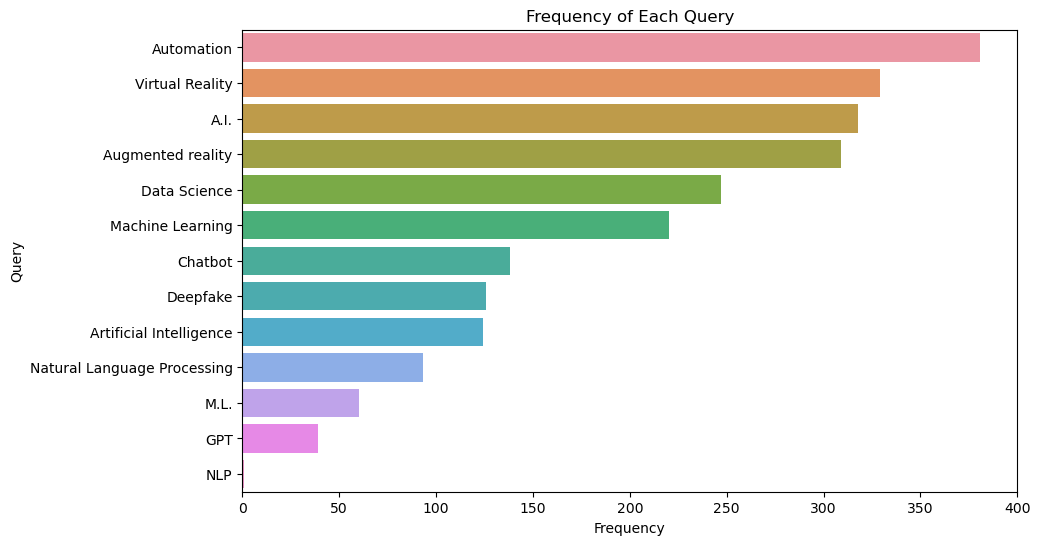

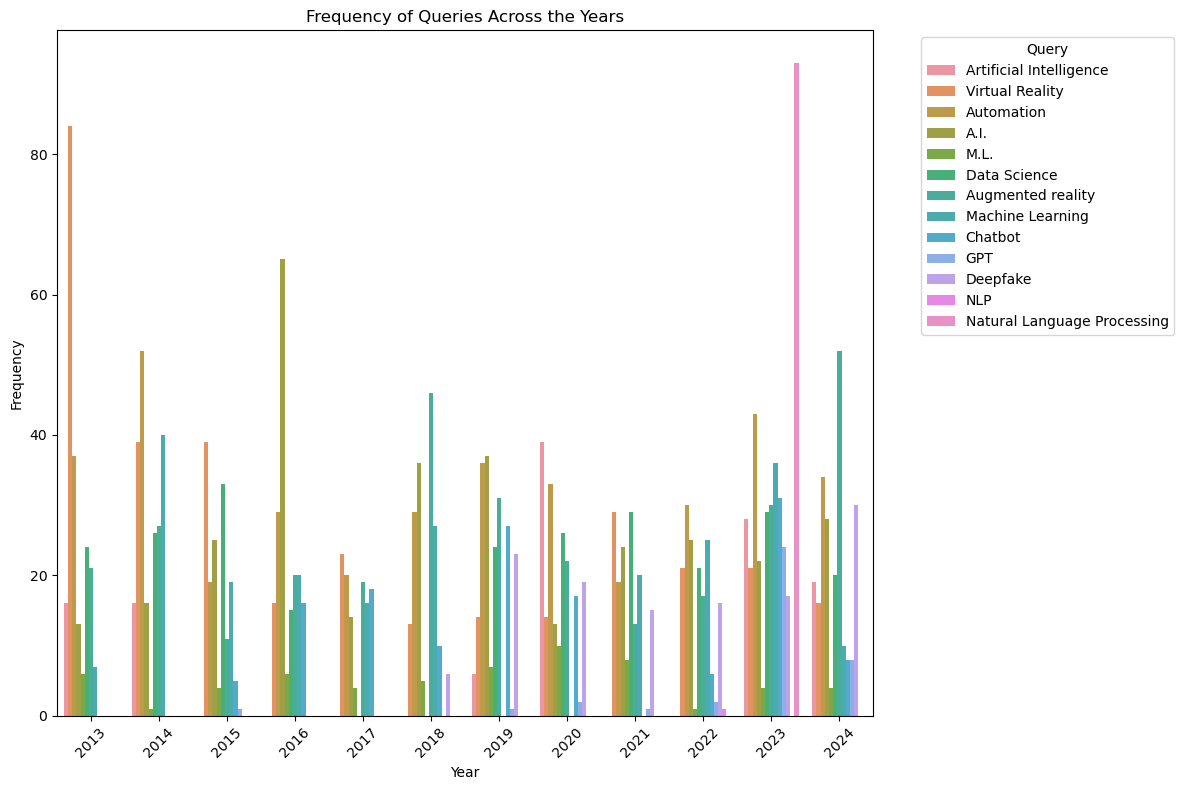

In [210]:
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('finaldata.csv')
df['Publication Date'] = pd.to_datetime(df['Publication Date'])

df['Year'] = df['Publication Date'].dt.year

plt.figure(figsize=(10, 6))
sns.countplot(y='Query', data=df, order=df['Query'].value_counts().index)
plt.title('Frequency of Each Query')
plt.xlabel('Frequency')
plt.ylabel('Query')
plt.show()


plt.figure(figsize=(12, 8))
sns.countplot(x='Year', hue='Query', data=df)
plt.title('Frequency of Queries Across the Years')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Query', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Now, let's inspect the average sentiment depending on each query.

### WordCloud

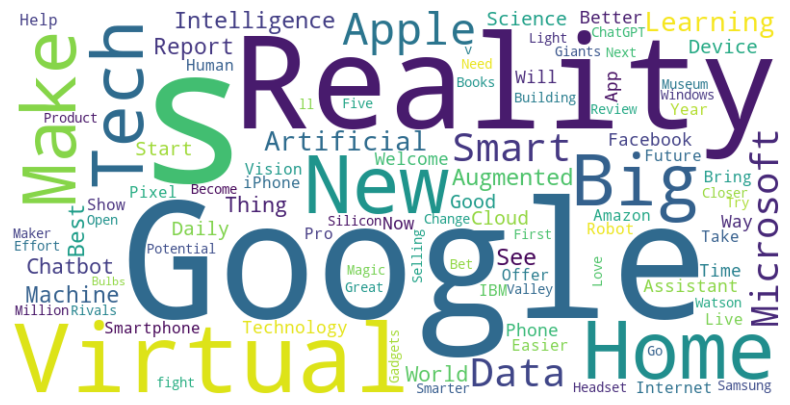

In [211]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

query_positive = df[df['Sentiment'] > 0.5]['Headline'].str.cat(sep=' ')

wordcloud = WordCloud(
    width=800,             
    height=400,             
    background_color='white', 
    max_words=100,      
    contour_color='steelblue',
    contour_width=1,         
    collocations=False        
).generate(query_positive)

plt.figure(figsize=(10, 5))  
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')              
plt.show()


Let's now start with the **Time Series Analysis**.

/var/folders/f9/9l49sc311253tlc_06jp5x9h0000gn/T/ipykernel_60181/1266291400.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dft['Publication Date'] = pd.to_datetime(dft['Publication Date'])


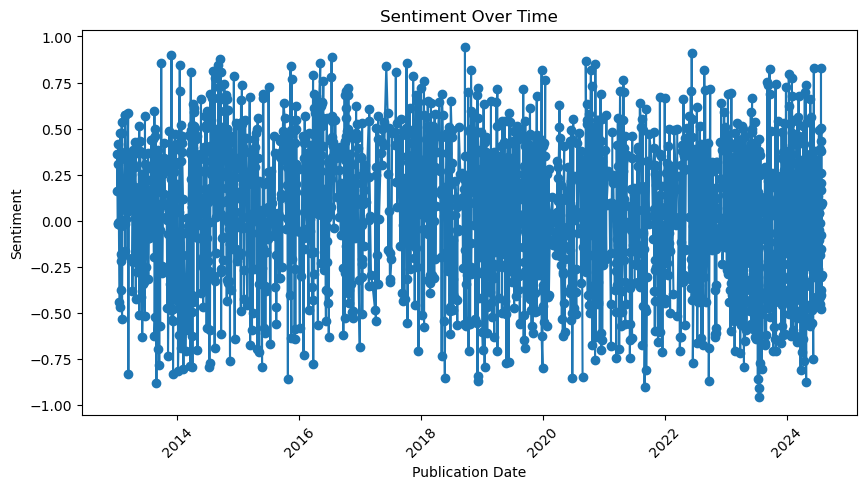

In [212]:
dft = df[['Publication Date','Sentiment']]
dft['Publication Date'] = pd.to_datetime(dft['Publication Date'])
dft.head()

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(dft['Publication Date'], dft['Sentiment'], marker='o')

plt.title('Sentiment Over Time')
plt.xlabel('Publication Date')
plt.ylabel('Sentiment')

plt.xticks(rotation=45)

plt.show()

This is extremely messy and we cannot interpret anything, we try two methods to help us with making this data more interpretable: Grouping by months (then years) and using the RollingMean.

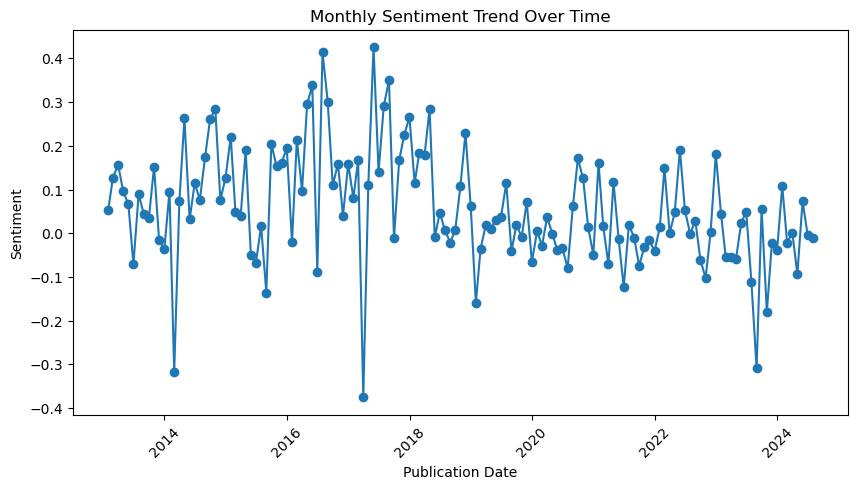

In [213]:
dft_monthly = dft.resample('M', on='Publication Date').mean()

plt.figure(figsize=(10, 5))
plt.plot(dft_monthly.index, dft_monthly['Sentiment'], marker='o')

plt.title('Monthly Sentiment Trend Over Time')
plt.xlabel('Publication Date')
plt.ylabel('Sentiment')

plt.xticks(rotation=45)

plt.show()

In [214]:
import pandas as pd
import calendar

dft['Month'] = dft['Publication Date'].dt.month

monthly_avg_sentiment = dft.groupby('Month')['Sentiment'].mean()

monthly_avg_sentiment.index = monthly_avg_sentiment.index.map(lambda x: calendar.month_name[x])

print(monthly_avg_sentiment)

Month
January      0.062286
February     0.036994
March        0.016417
April        0.064907
May          0.073421
June         0.005695
July         0.027226
August       0.037465
September    0.076432
October      0.084034
November     0.063409
December     0.048636
Name: Sentiment, dtype: float64


/var/folders/f9/9l49sc311253tlc_06jp5x9h0000gn/T/ipykernel_60181/2395567148.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dft['Month'] = dft['Publication Date'].dt.month


### First Half 

In [215]:
import pandas as pd
import calendar


first_5_years = dft[dft['Publication Date'].dt.year <= 2018] 
first_5_years['Month'] = first_5_years['Publication Date'].dt.month


monthly_avg_sentiment_first_5 = first_5_years.groupby('Month')['Sentiment'].mean()

monthly_avg_sentiment_first_5.index = monthly_avg_sentiment_first_5.index.map(lambda x: calendar.month_name[x])

print(monthly_avg_sentiment_first_5)


Month
January      0.098844
February     0.114224
March        0.088242
April        0.198882
May          0.118081
June         0.009536
July         0.139684
August       0.110385
September    0.105831
October      0.178468
November     0.114289
December     0.098318
Name: Sentiment, dtype: float64


/var/folders/f9/9l49sc311253tlc_06jp5x9h0000gn/T/ipykernel_60181/1019526018.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_5_years['Month'] = first_5_years['Publication Date'].dt.month


### Second Half 

In [216]:

first_5_years = dft[dft['Publication Date'].dt.year > 2018] 
first_5_years['Month'] = first_5_years['Publication Date'].dt.month


monthly_avg_sentiment_first_5 = first_5_years.groupby('Month')['Sentiment'].mean()

monthly_avg_sentiment_first_5.index = monthly_avg_sentiment_first_5.index.map(lambda x: calendar.month_name[x])

print(monthly_avg_sentiment_first_5)

Month
January      0.033292
February    -0.016638
March       -0.020610
April       -0.018701
May          0.039033
June         0.003024
July        -0.031521
August      -0.041432
September    0.047032
October     -0.045064
November     0.011620
December    -0.006014
Name: Sentiment, dtype: float64


/var/folders/f9/9l49sc311253tlc_06jp5x9h0000gn/T/ipykernel_60181/1228629706.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_5_years['Month'] = first_5_years['Publication Date'].dt.month


This is a good visula to give us the general idea. Let's further use years.

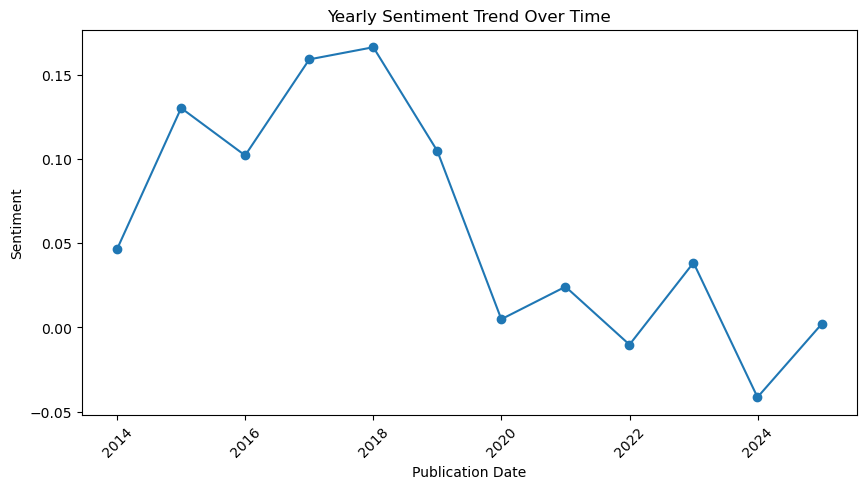

In [217]:
dft_yearly = dft.resample('Y', on='Publication Date').mean()

plt.figure(figsize=(10, 5))
plt.plot(dft_yearly.index, dft_yearly['Sentiment'], marker='o')

plt.title('Yearly Sentiment Trend Over Time')
plt.xlabel('Publication Date')
plt.ylabel('Sentiment')

plt.xticks(rotation=45)

plt.show()

Now, let's move on to the Time Series Forecasting. In order to proceed with the forecasting, we avaluate the performance of 3 models: Random Forests, GBM and XGBoost. We then use the RMSE score to better judge and compare the performance of each model.


Let's prepare the data.

In [218]:
df = pd.read_csv('finaldata.csv')
df['Publication Date'] = pd.to_datetime(df['Publication Date'])

# Step 1: Aggregate data by month (mean of Sentiment for each month)
df_yearly = df.resample('Y', on='Publication Date').mean()

# Step 2: Create lag features (using previous 12 months for forecasting since monthly data has more points)
def create_lagged_features(data, lag=5):
    df_lagged = pd.DataFrame()
    for i in range(1, lag + 1):
        df_lagged[f'lag_{i}'] = data.shift(i)
    df_lagged['Sentiment'] = data
    return df_lagged.dropna()

df_lagged = create_lagged_features(df_yearly['Sentiment'], lag=5)

# Step 3: Train-test split (80% training data, 20% test data)
train_size = int(len(df_lagged) * 0.8)
train, test = df_lagged.iloc[:train_size], df_lagged.iloc[train_size:]

X_train, y_train = train.drop('Sentiment', axis=1), train['Sentiment']
X_test, y_test = test.drop('Sentiment', axis=1), test['Sentiment']

## Random Forests

In [219]:
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

# Step 4: Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 5: Make predictions on test data
y_pred_train_rf = rf_model.predict(X_train)
y_pred_test_rf = rf_model.predict(X_test)

# Calculate the test error (RMSE) for Random Forests
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_test_rf))


## XGBoost

In [220]:
import xgboost as xgb

# Step 6: Train the XGBoost model
model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.8, random_state=42)
model.fit(X_train, y_train)

# Step 7: Make predictions on test data
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calculate the test error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

## GBM

In [221]:
from sklearn.ensemble import GradientBoostingRegressor

# Step 8: Train the Gradient Boosting model
gbm_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gbm_model.fit(X_train, y_train)

# Step 9: Make predictions on test data
y_pred_train_gbm = gbm_model.predict(X_train)
y_pred_test_gbm = gbm_model.predict(X_test)

# Calculate the test error (RMSE) for GBM
rmse_gbm = np.sqrt(mean_squared_error(y_test, y_pred_test_gbm))

In [222]:
print(f"Test RMSE for Random Forests: {rmse_rf}")
print(f"Test RMSE for XGBoost: {rmse}")
print(f"Test RMSE for GBM: {rmse_gbm}")


Test RMSE for Random Forests: 0.05426458639446911
Test RMSE for XGBoost: 0.03685765517801435
Test RMSE for GBM: 0.053422558208544337


XGBoost is the most accurate (with the least RMSE)! We thereby use it to forecast.

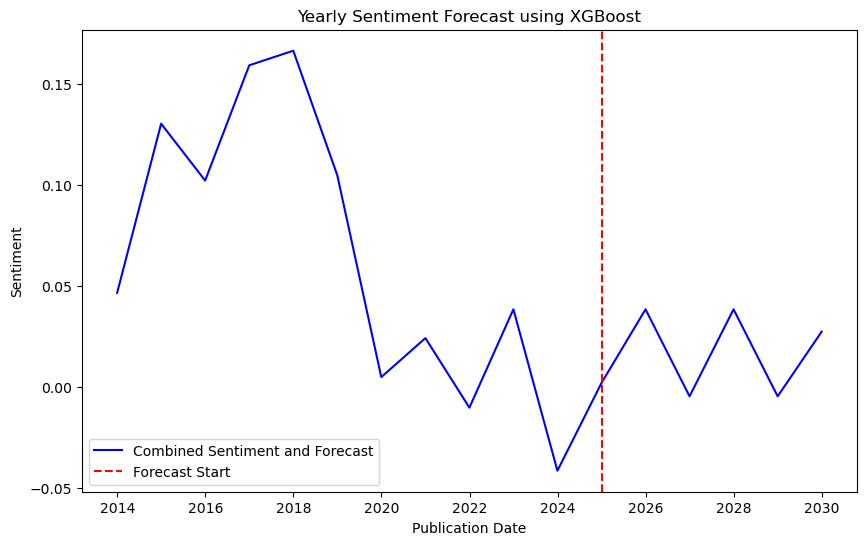

In [223]:
model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
last_lags = df_lagged.drop('Sentiment', axis=1).iloc[-1].values.reshape(1, -1)
forecast = []

for i in range(5): 
    next_pred = model.predict(last_lags)[0]
    forecast.append(next_pred)

    last_lags = np.roll(last_lags, -1)
    last_lags[0, -1] = next_pred 

forecast_index = pd.date_range(df_yearly.index[-1] + pd.DateOffset(years=1), periods=5, freq='Y')
forecast_series = pd.Series(forecast, index=forecast_index)

combined_series = pd.concat([df_yearly['Sentiment'], forecast_series])

plt.figure(figsize=(10, 6))
plt.plot(combined_series.index, combined_series, label='Combined Sentiment and Forecast', color='blue')
plt.axvline(df_yearly.index[-1], color='red', linestyle='--', label='Forecast Start')
plt.legend()
plt.title('Yearly Sentiment Forecast using XGBoost')
plt.xlabel('Publication Date')
plt.ylabel('Sentiment')
plt.show()

Although the yearly trend is easier to comment on, it is wiser to take the monthly data in order to capture the seasonality in the model.

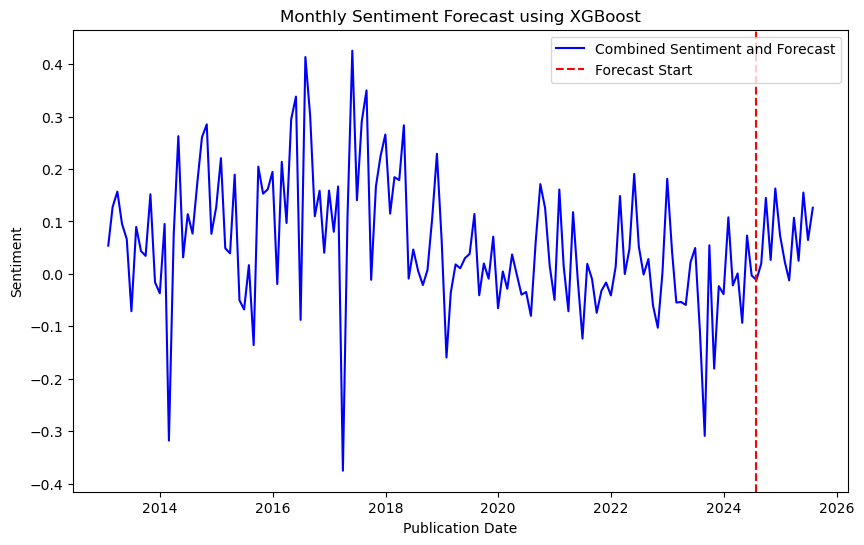

In [224]:

df_monthly = df.resample('M', on='Publication Date').mean()

def create_lagged_features(data, lag=12):
    df_lagged = pd.DataFrame()
    for i in range(1, lag + 1):
        df_lagged[f'lag_{i}'] = data.shift(i)
    df_lagged['Sentiment'] = data
    return df_lagged.dropna()

df_lagged = create_lagged_features(df_monthly['Sentiment'], lag=12)

train_size = int(len(df_lagged) * 0.8)
train, test = df_lagged.iloc[:train_size], df_lagged.iloc[train_size:]

X_train, y_train = train.drop('Sentiment', axis=1), train['Sentiment']
X_test, y_test = test.drop('Sentiment', axis=1), test['Sentiment']

model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

last_lags = df_lagged.drop('Sentiment', axis=1).iloc[-1].values.reshape(1, -1)
forecast = []

for i in range(12):  # Forecast 12 months into the future
    next_pred = model.predict(last_lags)[0]
    forecast.append(next_pred)

    last_lags = np.roll(last_lags, -1)
    last_lags[0, -1] = next_pred  

forecast_index = pd.date_range(df_monthly.index[-1] + pd.DateOffset(months=1), periods=12, freq='M')
forecast_series = pd.Series(forecast, index=forecast_index)

# Combine the original sentiment data with the forecast
combined_series = pd.concat([df_monthly['Sentiment'], forecast_series])

plt.figure(figsize=(10, 6))
plt.plot(combined_series.index, combined_series, label='Combined Sentiment and Forecast', color='blue')
plt.axvline(df_monthly.index[-1], color='red', linestyle='--', label='Forecast Start')
plt.legend()
plt.title('Monthly Sentiment Forecast using XGBoost')
plt.xlabel('Publication Date')
plt.ylabel('Sentiment')
plt.show()